In [1]:
import pandas as pd

In [2]:
import re 

def sorted_nicely( l ): 
    """ Sort the given iterable in the way that humans expect.""" 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

In [45]:
df_scores = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/all_chr_auc.h5')

In [149]:
df_scores_100kb = df_scores[df_scores['dist_thresh']==100000]
df_scores_1mb = df_scores[df_scores['dist_thresh']==1000000]
df_scores_10mb = df_scores[df_scores['dist_thresh']==10000000]

In [57]:
df_scores_plot = pd.concat([df_scores.drop(['plot'], axis=1), df_scores['plot'].apply(pd.Series)], axis=1)
df_plot = df_scores.groupby(['dist_thresh', 'chrm']).mean()

In [ ]:
for thresh in df_plot.index.tolist():
    axes = df_plot.T.reset_index()[10::].plot.scatter(x='index', y=thresh)
    #axes = zt.reset_index().plot.scatter(x='x_p', y=0, s=1)
    #axes.plot([0, 1], [0, 1], 'red', linewidth=1)
    #axes = df_plot.T.reset_index().plot(x='index', y=0.3)
    axes.plot([0, 1], [0, 1], 'red', linewidth=1)
    #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
    #axes.set_title('Predicting structure similarity from expression')
    #axes.yaxis.grid(True)
    #axes.set_xlabel('Co-expression')
    #axes.set_ylabel('AUC')
    #axes.set_ylim([0.0,1.101])
    #plt.setp(bp['fliers'], markersize=3.0)
    #0.5
    #fig, axes = plt.subplots()
    #axes.scatter(x, y)
    #axes.plot(x, y)
    axes.set_ylim([0,1])
    axes.set_xlim([0,1])

    #plt.show()
    plt.show()

In [137]:
df_scores_10mb_test = df_scores_10mb[df_scores_10mb['chrm'] == 'chr11']
df_scores_10mb_test['DE_Prior_Rank_10'] = [int(x*10)/10 if x > 0 else -1 for x in df_scores_10mb_test['DE_Prior_Rank']]

In [161]:
df_scores_1mb['Tier'] = [1 if x > 0 else -1 for x in df_scores_1mb['Tier']]
df_scores_1mb['hk_presence'] = [1 if x > 0 else -1 for x in df_scores_1mb['hk_presence']]
df_scores_1mb['rna_binding'] = [1 if x > 0 else -1 for x in df_scores_1mb['rna_binding']]
df_scores_1mb['DE_Prior_Rank_10'] = [1 if x >= .5 else 0 if x < .5  else -1 for x in df_scores_1mb['DE_Prior_Rank']]


In [163]:
df_scores_1mb['DE_Prior_Rank_10'] = [1 if x >= .5 else 0 if x < .5  else -1 for x in df_scores_1mb['DE_Prior_Rank']]

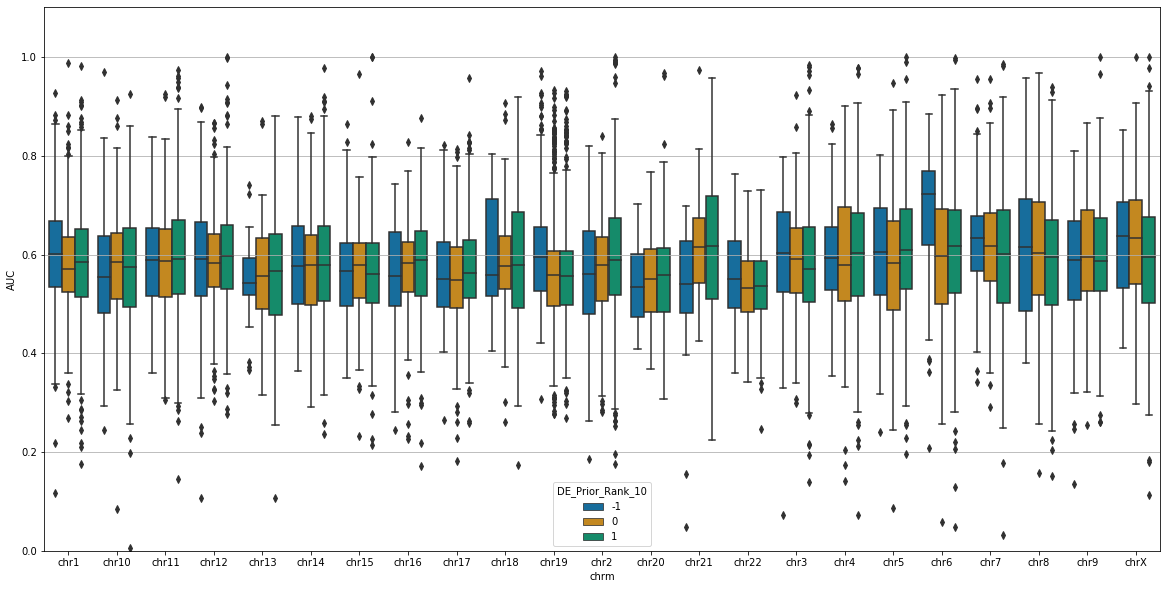

In [164]:
import seaborn as sns
fig, axes = plt.subplots(figsize=(20,10))
#grouped = df_scores.groupby(['threshold'])

#bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
#bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
sns.boxplot(y='auc', x='chrm', 
                 data=df_scores_1mb, 
                 palette="colorblind",
                 hue='DE_Prior_Rank_10'
           )
#bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
#axes.set_title('Predicting structure similarity from expression')
axes.yaxis.grid(True)
#axes.set_xlabel('Co-expression')
axes.set_ylabel('AUC')
axes.set_ylim([0.0,1.101])
#plt.setp(bp['fliers'], markersize=3.0)

plt.show()

In [283]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as plticker


def plots_with_1_level(group_x):

    change_group_level_1 = df_2_or_uniq.groupby(['chrom_x'])
    nrow = int(len(change_group_level_1.groups.keys())/3) + 1
    ncol = 3
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(4*ncol, 4*nrow),sharex=True,sharey=True) 

    for key_level_1,ax in zip(sorted_nicely(change_group_level_1.groups.keys()),axes.flatten()):
        given_group_level_1 = change_group_level_1.get_group(key_level_1)
        #given_group2 = given_group_level_1.groupby(['order_diff', 'category']).mean().groupby(level=2)['exp'].plot(ax=ax)
        given_group2 = given_group_level_1.groupby([group_x]).mean()['exp'].plot(ax=ax)
        given_group2 = given_group_level_1.groupby([group_x]).mean()['exp (GK)'].plot(ax=ax)
        #given_group2 = given_group_level_1.groupby([group_x]).mean()['SRP063477'].plot(ax=ax)
        #given_group2 = given_group_level_1.groupby([group_x]).mean()['SRP026208'].plot(ax=ax)
        #given_group2 = given_group_level_1.groupby([group_x]).mean()['SRP115956'].plot(ax=ax)

        ax.axhline(y=0.5, color='r', linestyle='-')
        #ax.set_xlim([0, 2000])
        ax.legend()
        rects = ax.patches  
        ax.set_title('%s' %(key_level_1))
        #ax.set_ylabel('%Population')
        ax.set_xlabel('Distance between gene pairs (MB)')
        ax.set_ylabel('Co-expression')
        

def plots_with_2_groups(group_2='None', group_3_x='category'):   
    change_group_level_1 = df_2_or_uniq.groupby(['chrom_x'])
    change_group_level_2 = df_2_or_uniq.groupby([group_2])
    nrow = len(change_group_level_1.groups.keys())
    ncol = len(change_group_level_2.groups.keys())
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(8*ncol, 8*nrow),sharey=True) 

    for key_level_1,ax_row in zip(sorted_nicely(change_group_level_1.groups.keys()) ,axes):
        given_group_level_1 = change_group_level_1.get_group(key_level_1)
        change_group = given_group_level_1.groupby([group_2])
        for key,ax in zip(change_group.groups.keys(),ax_row):
            given_group = change_group.get_group(key)
            #given_group2 = given_group.groupby([group_3_x, 'category']).mean().groupby(level=1)['exp'].plot(ax=ax)
            given_group2 = given_group.groupby([group_3_x]).mean()['exp'].plot(ax=ax)
            given_group2 = given_group.groupby([group_3_x]).mean()['exp_georg'].plot(ax=ax)
            ax.legend()
            rects = ax.patches  
            ax.set_title('%s, %s' %(key_level_1,key))
            ax.axhline(y=0.5, color='r', linestyle='-')
            ax.set_ylabel('%Population')
            ax.set_ylim([0.3, 0.9])
            
            
def plots_with_2_groups_same_plot(group_2='None', group_3_x='category'):   
    change_group_level_1 = df_2_or_uniq.groupby(['chrom_x'])
    change_group_level_2 = df_2_or_uniq.groupby([group_2])
    nrow = int(len(change_group_level_1.groups.keys())/3) + 1
    ncol = 3
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(4*ncol, 4*nrow),sharey=True, sharex=True) 

    for key_level_1,ax in zip(sorted_nicely(change_group_level_1.groups.keys()) ,axes.flatten()):
        given_group_level_1 = change_group_level_1.get_group(key_level_1)
        change_group = given_group_level_1.groupby([group_2])
        for key in change_group.groups.keys():
            given_group = change_group.get_group(key)
            #given_group2 = given_group.groupby([group_3_x, 'category']).mean().groupby(level=1)['exp'].plot(ax=ax)
            given_group2 = given_group.groupby([group_3_x]).mean()['exp'].plot(ax=ax)
            #given_group2 = given_group.groupby([group_3_x]).mean()['exp_georg'].plot(ax=ax)
            #ax.legend()
            rects = ax.patches  
            ax.set_title('%s, %s' %(key_level_1,key))
            ax.axhline(y=0.5, color='r', linestyle='-')
    ax.set_ylabel('Co-expression')
    ax.set_xlabel('Distance between gene pairs (MB)')
    #ax.set_ylim([0.3, 0.9])
            

def plots_with_1_level_3d(df, group_x):
    change_group_level_1 = df.groupby(['chrom_x'])
    nrow = int(len(change_group_level_1.groups.keys())/3) + 1
    ncol = 3
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(4*ncol, 4*nrow)) 

    for key_level_1,ax in zip(sorted_nicely(change_group_level_1.groups.keys()),axes.flatten()):
            given_group_level_1 = change_group_level_1.get_group(key_level_1)
            H = given_group_level_1.pivot_table(index='gene_order_tss_x', columns='gene_order_tss_y', values=group_x)
            #print (H)
            print ((H - H.T).max().max())
            #H.mask(H < 0, inplace=True)
            #elix.reset_index(drop=True, inplace=True)
            #print H.max()
            vmax= 1.0
            cmap = LinearSegmentedColormap.from_list('mycmap', [(0/ vmax, 'red'), (1./2, 'white'), (vmax / vmax, 'blue')])
            current_cmap = cmap
            current_cmap.set_bad(color='grey')
            #      vmax= 1000000
            #      current_cmap = LinearSegmentedColormap.from_list('mycmap', [ (0/ vmax, 'white'), (vmax / vmax, 'blue')])
            #      imgp = ax.imshow(H.T,origin='low', aspect='auto' , cmap=current_cmap, norm=LogNorm(vmin=1, vmax=vmax))
            imgp = ax.imshow(H,origin='low', aspect='auto' , vmin=0, vmax=vmax, cmap=current_cmap)
            #sns.heatmap(H, annot = False) 
            ax.set_title('%s' %(key_level_1))
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.set_xlabel("Genes in chromosome order")
            ax.set_ylabel("Genes in chromosome order")
            
    cbar = ax.figure.colorbar(imgp, ax=ax)
            

In [6]:
from lohia_utilities.create_corr_network import *

In [288]:
df = pd.read_csv("/home/lohia/data/gene_distance_expresseion/georg_paper/MSB-17-7548_Dataset_EV1.csv")
df = df[df.columns[~df.columns.str.contains('SILAC_GM')]] #only keeping the mRNA samples
df.drop(['Protein_IDs', 'Protein_names', 'Gene_names'], axis=1, inplace=True)
df.set_index('Gene_IDs', inplace=True)
df = df - df.median()
georg_paper_corr = create_nw(df, True)
georg_paper_corr.to_hdf('/home/lohia/data/gene_distance_expresseion/georg_paper/exp_sub_median.h5' , key='df', mode='w')

In [260]:
df_2_or = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/combined_dist_with_georg_sub_median.h5')

In [237]:
df_2_or = df_2_or[df_2_or['exp_georg'] >= 0] # liming the matrix to only chosen values for rank standerization
ranked_matirx = rank(df_2_or['exp_georg'])
df_2_or['exp_georg'] = ranked_matirx
df_2_or.rename(columns={"exp_georg": "exp (GK)"}, inplace=True)

ranked_matirx = rank(df_2_or['exp'])
df_2_or['exp'] = ranked_matirx

In [261]:
ranked_matirx = rank(df_2_or['exp'])
df_2_or['exp'] = ranked_matirx

In [262]:
#merges DE prior genes
ensg_gene_name = pd.read_csv("/data/lohia/gene_distance_expresseion/ENSG_gene_name.txt", sep='\t')
mg_de_prior = pd.read_csv("/data/lohia/gene_distance_expresseion/mc_predictability/pnas.1802973116.sd02.txt", sep='\t')
ensg_gene_name = ensg_gene_name.drop_duplicates('Gene name')
ensg_gene_name_mg_prior = ensg_gene_name.merge(right= mg_de_prior[['Gene_Name','DE_Prior_Rank', 'Gene_Order']], left_on='Gene name', right_on='Gene_Name')

ensg_gene_name_mg_prior.rename(columns={"Gene stable ID": "Gene stable ID_x"}, inplace=True)
df_2_or = df_2_or.merge(right=ensg_gene_name_mg_prior, on='Gene stable ID_x', how='left')
ensg_gene_name_mg_prior.rename(columns={"Gene stable ID_x": "Gene stable ID_y"}, inplace=True)
df_2_or = df_2_or.merge(right=ensg_gene_name_mg_prior, on='Gene stable ID_y', how='left')


In [212]:
#merges DE prior genes
ensg_gene_name = pd.read_csv("/data/lohia/gene_distance_expresseion/ENSG_gene_name.txt", sep='\t')
mg_de_prior = pd.read_csv("/data/lohia/gene_distance_expresseion/mc_predictability/pnas.1802973116.sd02.txt", sep='\t')
ensg_gene_name = ensg_gene_name.drop_duplicates('Gene name')
ensg_gene_name_mg_prior = ensg_gene_name.merge(right= mg_de_prior[['Gene_Name','DE_Prior_Rank', 'Gene_Order']], left_on='Gene name', right_on='Gene_Name')
df_scores_10mb = df_scores_10mb.merge(right=ensg_gene_name_mg_prior, on='Gene stable ID', how='left')
df_scores_1mb = df_scores_1mb.merge(right=ensg_gene_name_mg_prior, on='Gene stable ID', how='left')
df_scores_100kb = df_scores_100kb.merge(right=ensg_gene_name_mg_prior, on='Gene stable ID', how='left')

In [263]:
#merge rna binding genes
rna_binding_genes = pd.read_csv("/data/lohia/gene_distance_expresseion/rna_binding_proteins/41576_2014_BFnrg3813_MOESM25_ESM/RBP table-Table 1.tsv", sep='\t')
rna_binding_genes['rna_binding'] = 1


rna_binding_genes.rename(columns={"gene id": "Gene stable ID_x"}, inplace=True)
df_2_or = df_2_or.merge(right=rna_binding_genes[['Gene stable ID_x', 'consensus RNA target', 'rna_binding']], on='Gene stable ID_x', how='left')
rna_binding_genes.rename(columns={"Gene stable ID_x": "Gene stable ID_y"}, inplace=True)
df_2_or = df_2_or.merge(right=rna_binding_genes[['Gene stable ID_y', 'consensus RNA target', 'rna_binding']], on='Gene stable ID_y', how='left')

In [151]:
#merge rna binding genes
rna_binding_genes = pd.read_csv("/data/lohia/gene_distance_expresseion/rna_binding_proteins/41576_2014_BFnrg3813_MOESM25_ESM/RBP table-Table 1.tsv", sep='\t')
rna_binding_genes.rename(columns={"gene id": "Gene stable ID"}, inplace=True)
rna_binding_genes['rna_binding'] = 1
df_scores_10mb = df_scores_10mb.merge(right=rna_binding_genes[['Gene stable ID', 'consensus RNA target', 'rna_binding']], on='Gene stable ID', how='left')
df_scores_1mb = df_scores_1mb.merge(right=rna_binding_genes[['Gene stable ID', 'consensus RNA target', 'rna_binding']], on='Gene stable ID', how='left')
df_scores_100kb = df_scores_100kb.merge(right=rna_binding_genes[['Gene stable ID', 'consensus RNA target', 'rna_binding']], on='Gene stable ID', how='left')

In [264]:
#merge cancer genes
cancer_genes = pd.read_csv("/data/lohia/gene_distance_expresseion/cancer_genes/cosmic_cancer.tsv", sep='\t')
cancer_genes['cancer_presence'] = 1
ensg_gene_name_cancer = ensg_gene_name.merge(right= cancer_genes[['Gene Symbol', 'cancer_presence']], left_on='Gene name', right_on='Gene Symbol')
ensg_gene_name_cancer.rename(columns={"Gene stable ID": "Gene stable ID_x"}, inplace=True)
df_2_or = df_2_or.merge(right=ensg_gene_name_cancer, on='Gene stable ID_x', how='left')
ensg_gene_name_cancer.rename(columns={"Gene stable ID_x": "Gene stable ID_y"}, inplace=True)
df_2_or = df_2_or.merge(right=ensg_gene_name_cancer, on='Gene stable ID_y', how='left')

In [152]:
#merge cancer genes
cancer_genes = pd.read_csv("/data/lohia/gene_distance_expresseion/cancer_genes/cosmic_cancer.tsv", sep='\t')

ensg_gene_name_cancer = ensg_gene_name.merge(right= cancer_genes[['Gene Symbol', 'Tier']], left_on='Gene name', right_on='Gene Symbol')
df_scores_10mb = df_scores_10mb.merge(right=ensg_gene_name_cancer, on='Gene stable ID', how='left')
df_scores_1mb = df_scores_1mb.merge(right=ensg_gene_name_cancer, on='Gene stable ID', how='left')
df_scores_100kb = df_scores_100kb.merge(right=ensg_gene_name_cancer, on='Gene stable ID', how='left')

In [215]:
#house keeping genes
hk_genes = pd.read_csv("/data/lohia/gene_distance_expresseion/hk_genes/HK_genes.txt", sep='\t', names=['gene_name', 'nm_id'])
hk_genes['hk_presence'] = 1
ensg_gene_name_hk = ensg_gene_name.merge(right= hk_genes[['gene_name','hk_presence']], left_on='Gene name', right_on='gene_name')
ensg_gene_name_hk.rename(columns={"Gene stable ID": "Gene stable ID_x"}, inplace=True)
df_2_or = df_2_or.merge(right=ensg_gene_name_hk, on='Gene stable ID_x', how='left')
ensg_gene_name_hk.rename(columns={"Gene stable ID_x": "Gene stable ID_y"}, inplace=True)
df_2_or = df_2_or.merge(right=ensg_gene_name_hk, on='Gene stable ID_y', how='left')

In [153]:
#house keeping genes
hk_genes = pd.read_csv("/data/lohia/gene_distance_expresseion/hk_genes/HK_genes.txt", sep='\t', names=['gene_name', 'nm_id'])
hk_genes['hk_presence'] = 1
ensg_gene_name_hk = ensg_gene_name.merge(right= hk_genes[['gene_name','hk_presence']], left_on='Gene name', right_on='gene_name')

df_scores_10mb = df_scores_10mb.merge(right=ensg_gene_name_hk, on='Gene stable ID', how='left')
df_scores_1mb = df_scores_1mb.merge(right=ensg_gene_name_hk, on='Gene stable ID', how='left')
df_scores_100kb = df_scores_100kb.merge(right=ensg_gene_name_hk, on='Gene stable ID', how='left')

In [265]:
import math
df_2_or['order_diff'] = abs(df_2_or['gene_order_tss_x'] - df_2_or['gene_order_tss_y'])
df_2_or['dc_both'] =[x if (math.isnan(x) and math.isnan(y)) else y if math.isnan(x) else x if math.isnan(y) else max(x,y) for x,y in zip(df_2_or['dc_y'],df_2_or['dc_x'])]
#df_2_or['dc_both'] = df_2_or['dc_x'] + df_2_or['dc_y']
df_2_or['category'] =['NA' if math.isnan(x) else 'D' if x>0.0 else 'O' for x in df_2_or['dc_both']]

In [266]:
df_2_or['tot_prior_rank'] = (df_2_or['DE_Prior_Rank_x'] + df_2_or['DE_Prior_Rank_y'])/2.0
df_2_or['tot_rna_binding'] = (df_2_or['rna_binding_x'] + df_2_or['rna_binding_y'])/2.0
df_2_or['tot_cancer_presence'] = (df_2_or['cancer_presence_x'] + df_2_or['cancer_presence_y'])/2.0

In [267]:
df_2_or['hk_group'] = [ 'present' if x > 0 else 'absent' for x in df_2_or['exp_georg'] ]
df_2_or['rna_binding_group'] = [ 'present' if x > 0 else 'absent' for x in df_2_or['tot_rna_binding'] ]
df_2_or['cancer_presence_group'] = [ 'present' if x > 0 else 'absent' for x in df_2_or['tot_cancer_presence'] ]

In [257]:
df_2_or['tot_rna_binding'].min()

1.0

In [195]:
df_2_or['gene_type_comb_category'] = ['pc' if x==y=='protein_coding' else 'nc' if (x!='protein_coding') & (y!='protein_coding') else 'pn' for x,y in zip(df_2_or['Gene type_x'], df_2_or['Gene type_y'])]

In [259]:
df_2_or['gene_prior_type'] = ['high' if ((x >= .5) & (y >= .5)) else 'low' if ((x < .5) & (y < .5)) else 'mixed' for x,y in zip(df_2_or['DE_Prior_Rank_x'], df_2_or['DE_Prior_Rank_y'])]

In [268]:
df_2_or['pairs'] = [sorted([x,y])[0]+"_"+sorted([x,y])[1] for x,y in zip(df_2_or['Gene stable ID_y'], df_2_or['Gene stable ID_x'])]
df_2_or_uniq = df_2_or[df_2_or['Gene stable ID_y'] != df_2_or['Gene stable ID_x']].copy(deep=True)
df_2_or_uniq.drop_duplicates(subset=['pairs', 'chrom_x'], inplace=True)

In [269]:
#these are equi to calculating block mean
df_2_or_uniq['tss_dist_1000000'] = df_2_or_uniq['tss_tss'] / 1000000
df_2_or_uniq['tss_dist_1000000'] = df_2_or_uniq['tss_dist_1000000'].astype('int')
df_2_or_uniq['order_diff_10'] = df_2_or_uniq['order_diff'] / 10
df_2_or_uniq['order_diff_10'] = df_2_or_uniq['order_diff_10'].astype('int')

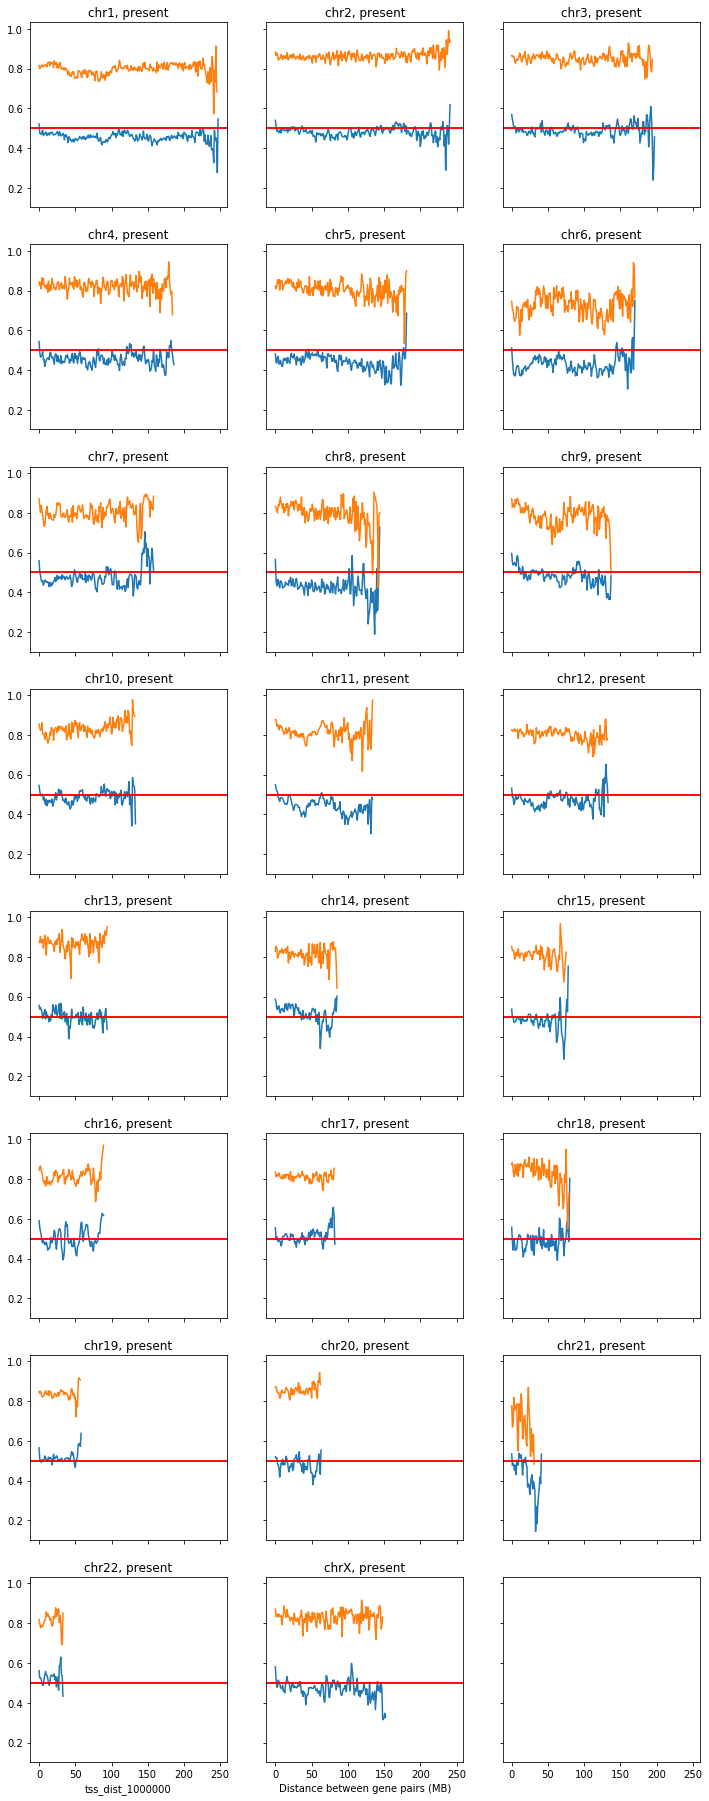

In [276]:
plots_with_2_groups_same_plot(group_2='hk_group', group_3_x='tss_dist_1000000') 

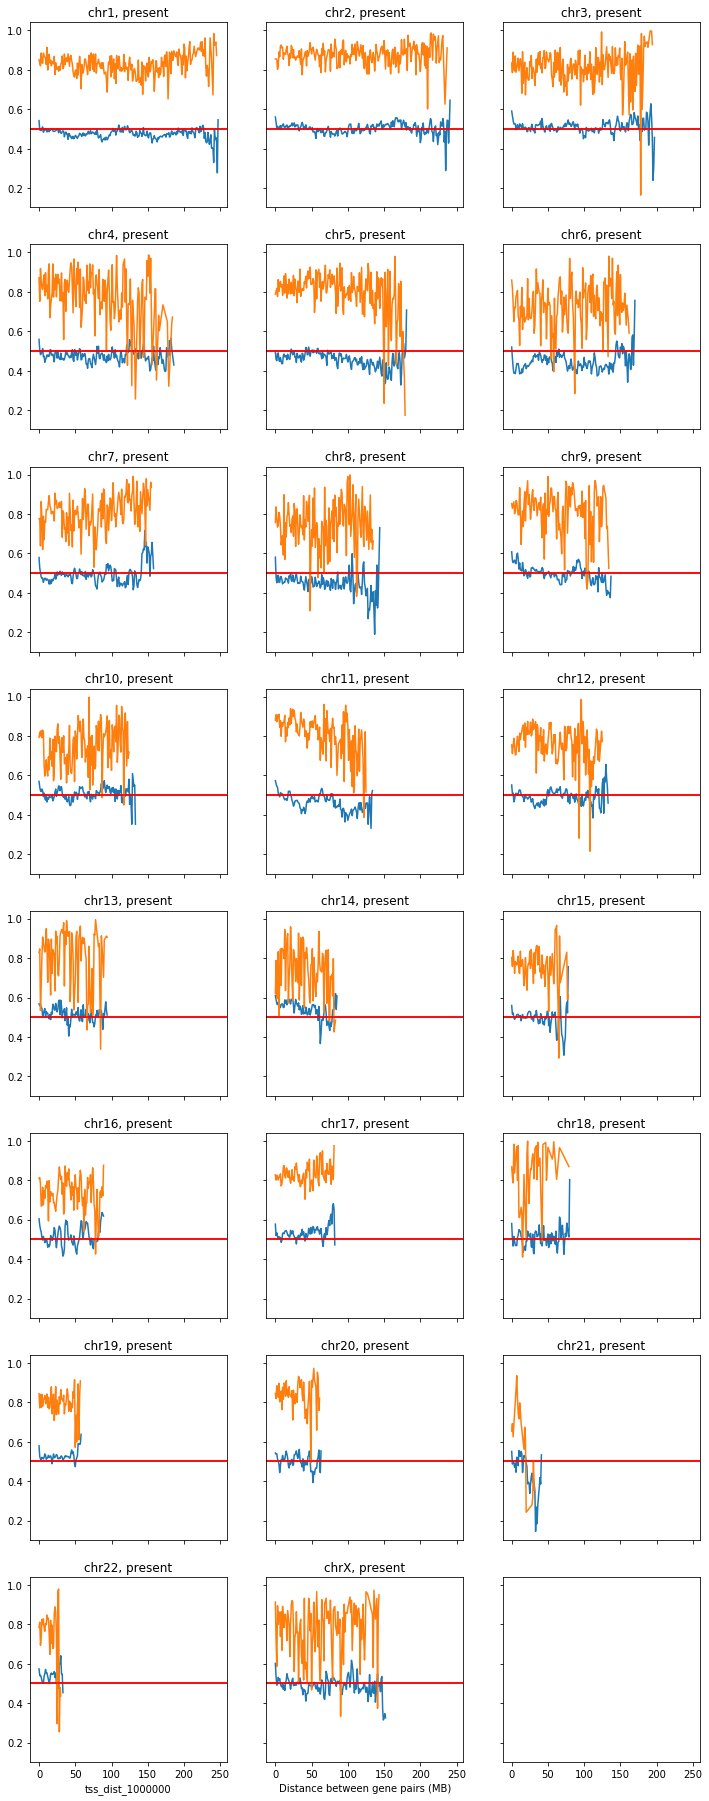

In [277]:
plots_with_2_groups_same_plot(group_2='rna_binding_group', group_3_x='tss_dist_1000000') 

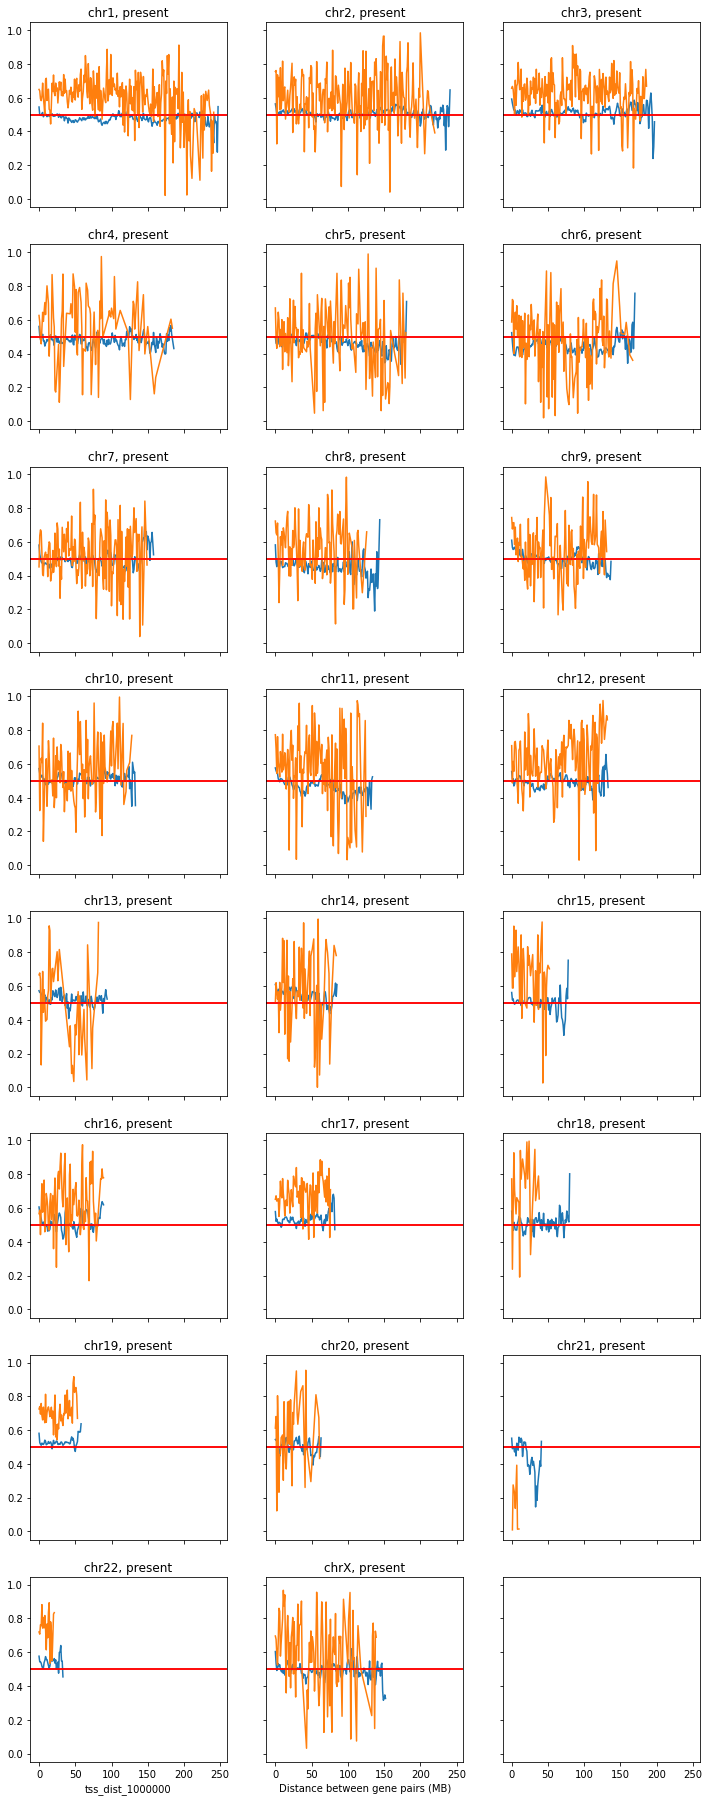

In [278]:
plots_with_2_groups_same_plot(group_2='cancer_presence_group', group_3_x='tss_dist_1000000') 

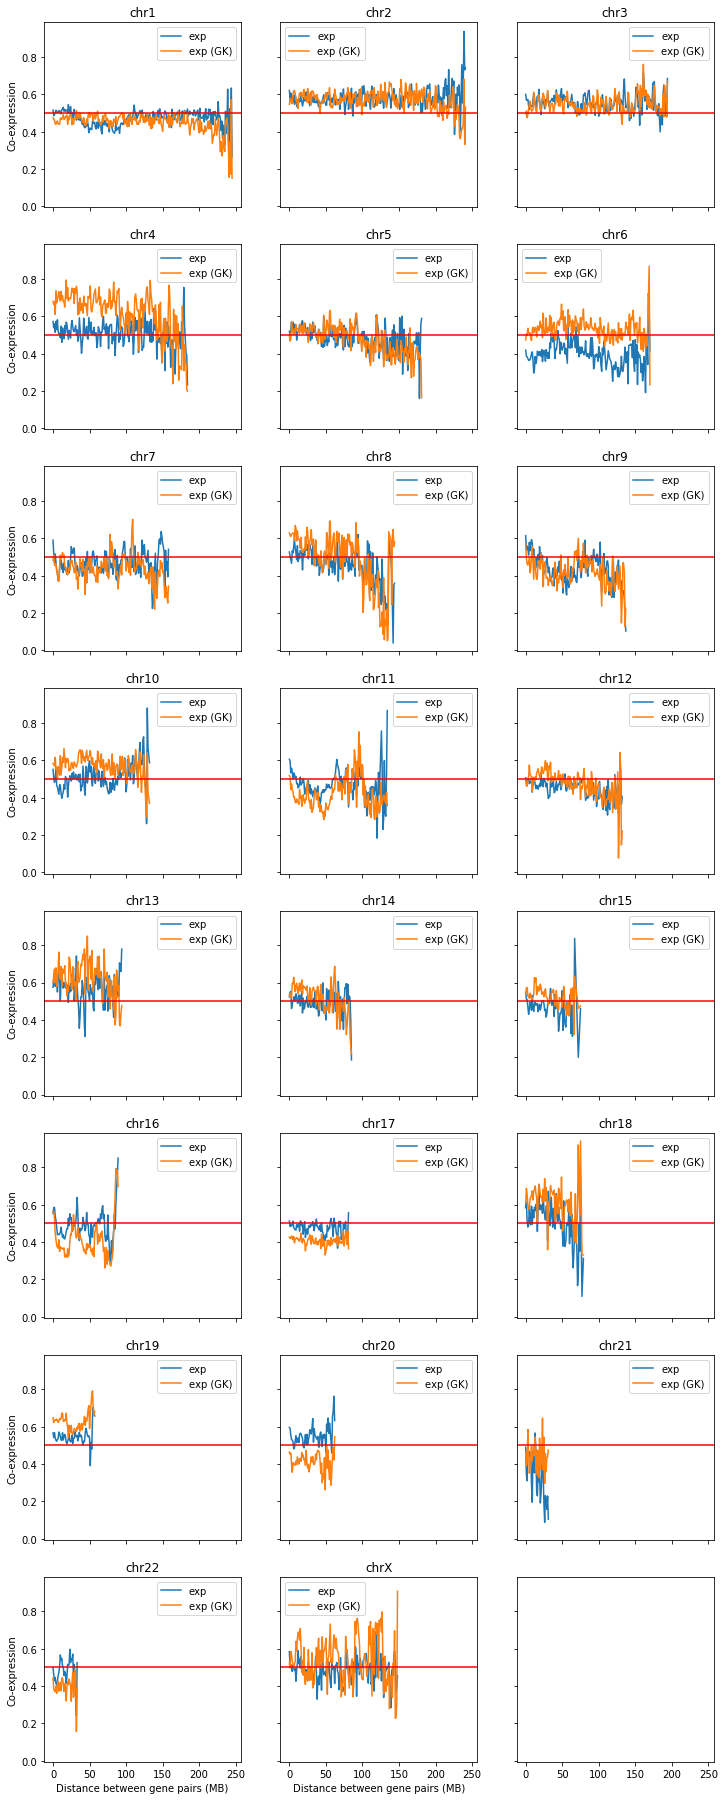

In [203]:
plots_with_1_level('tss_dist_1000000')

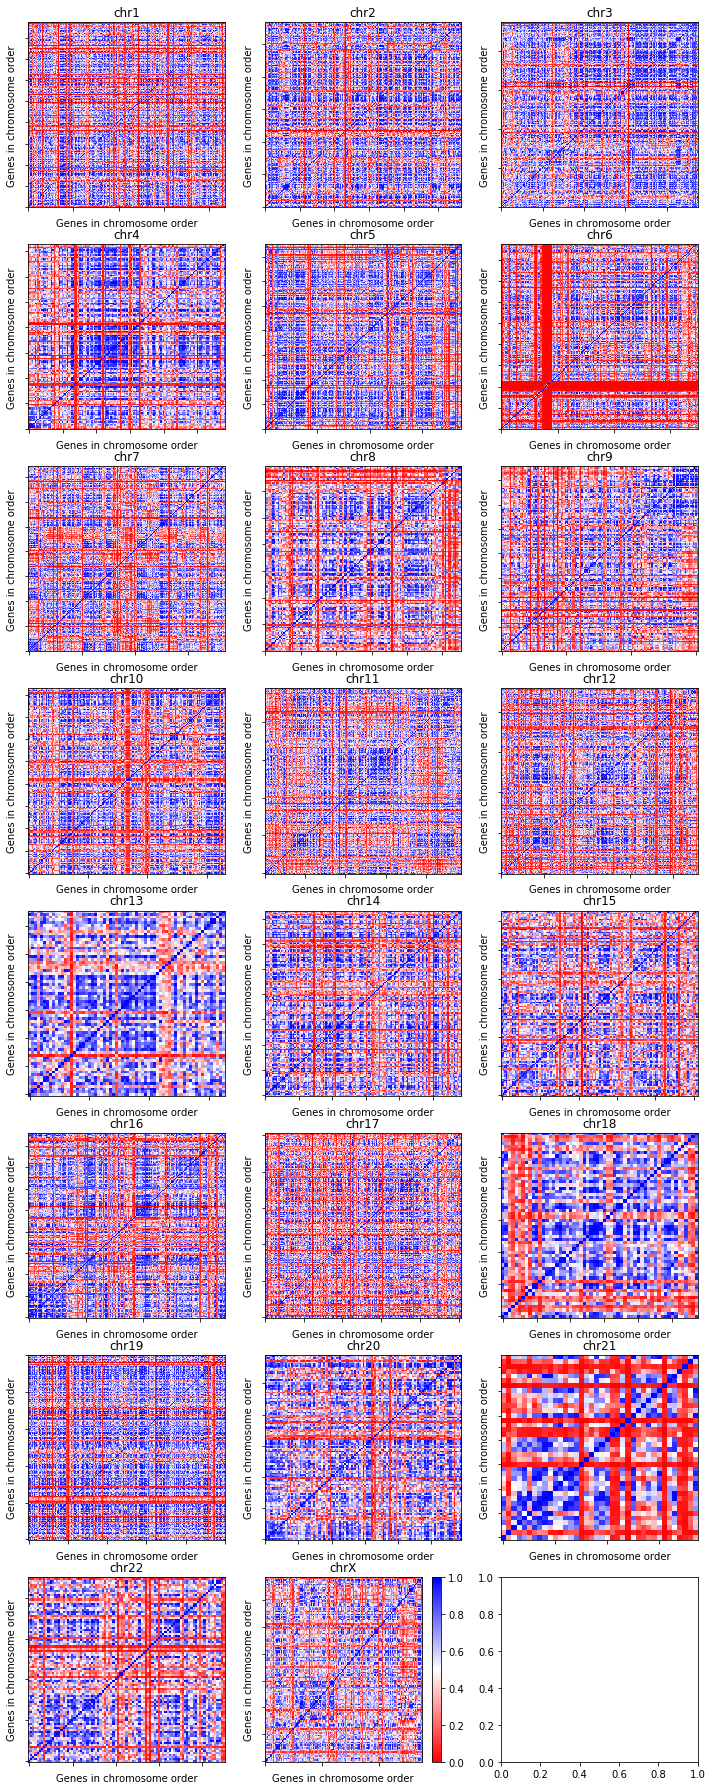

In [207]:
plots_with_1_level_3d('exp')

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


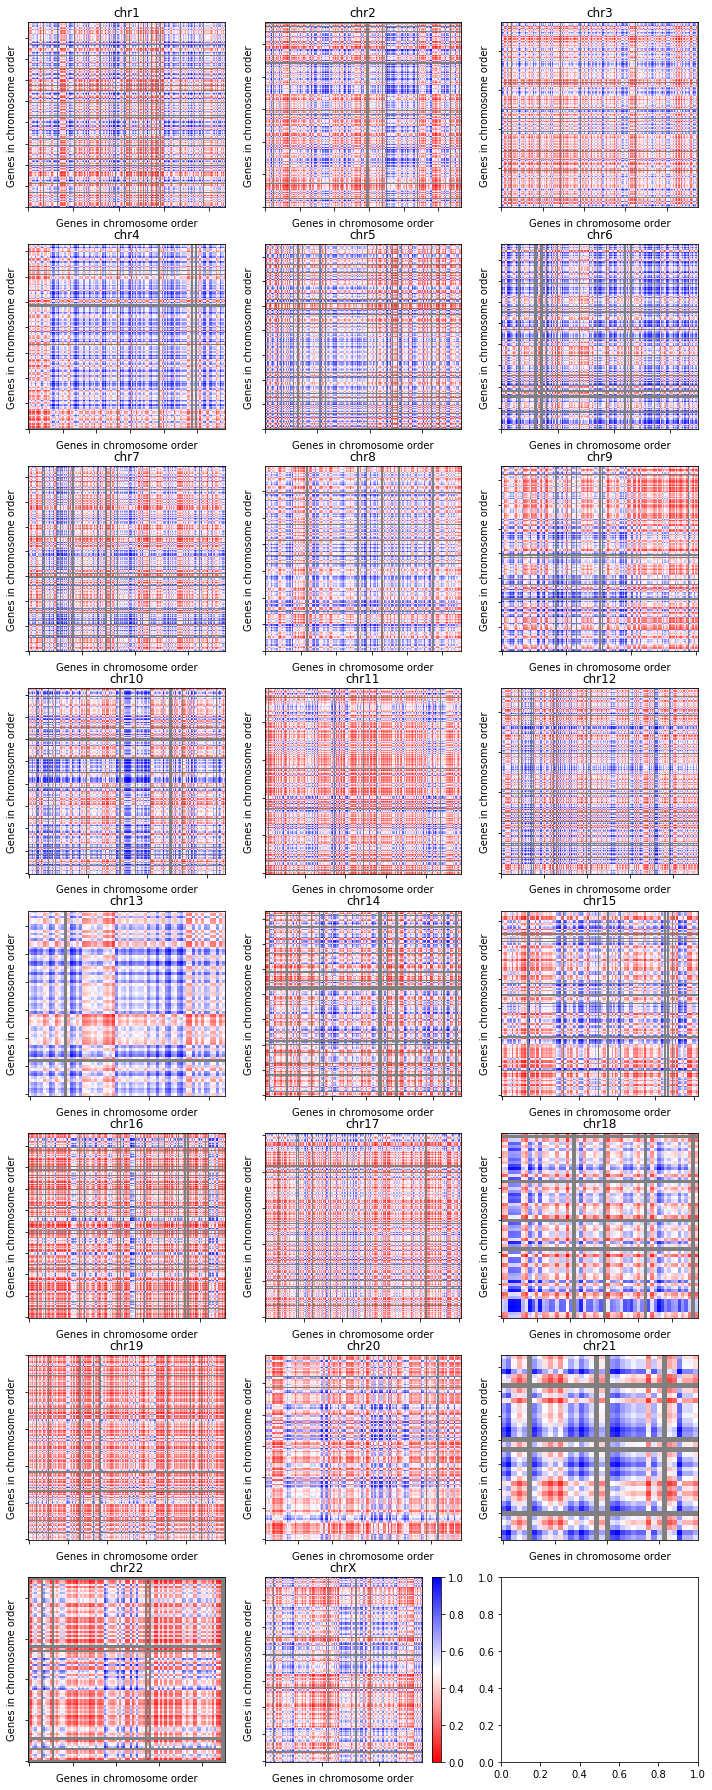

In [253]:
plots_with_1_level_3d('tot_prior_rank')

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


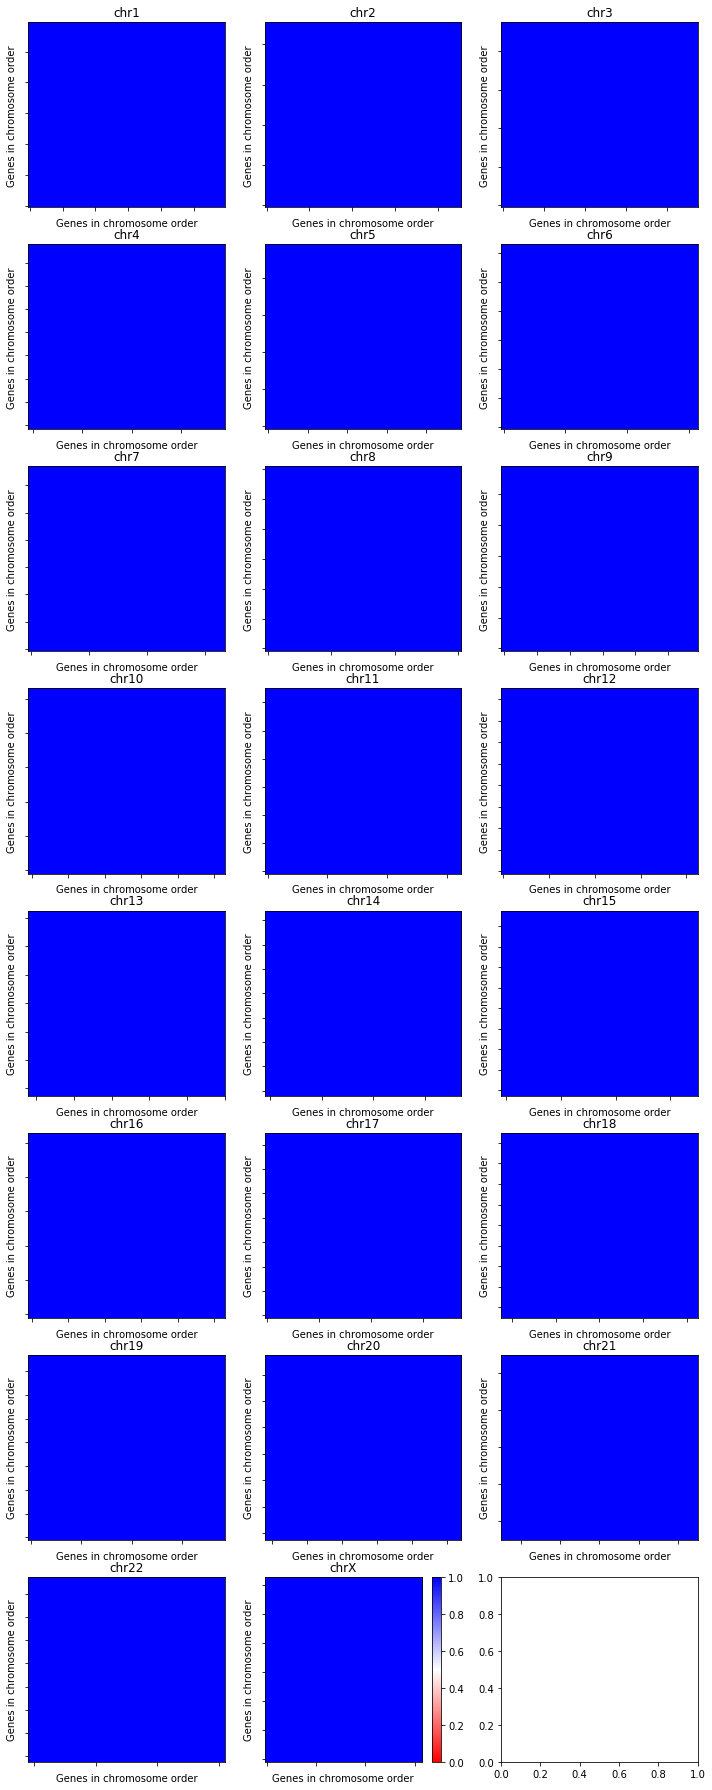

In [281]:
plots_with_1_level_3d('tot_cancer_presence')

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


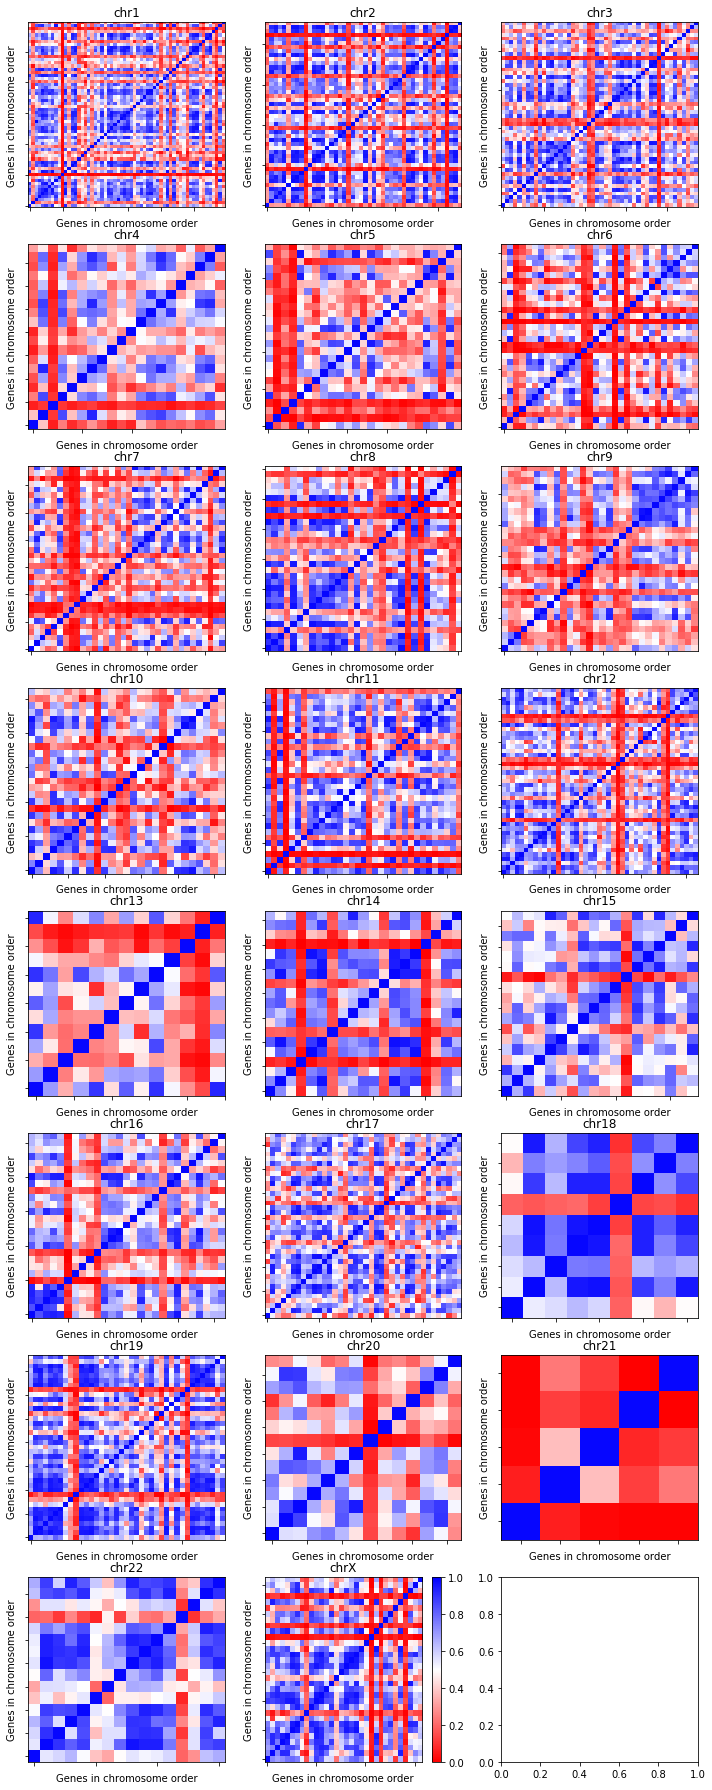

In [289]:
df_tmp = df_2_or[df_2_or['tot_cancer_presence'] >= 0]
ranked_matirx = rank(df_tmp['exp'])
df_tmp['exp'] = ranked_matirx
plots_with_1_level_3d(df_tmp, 'exp')

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


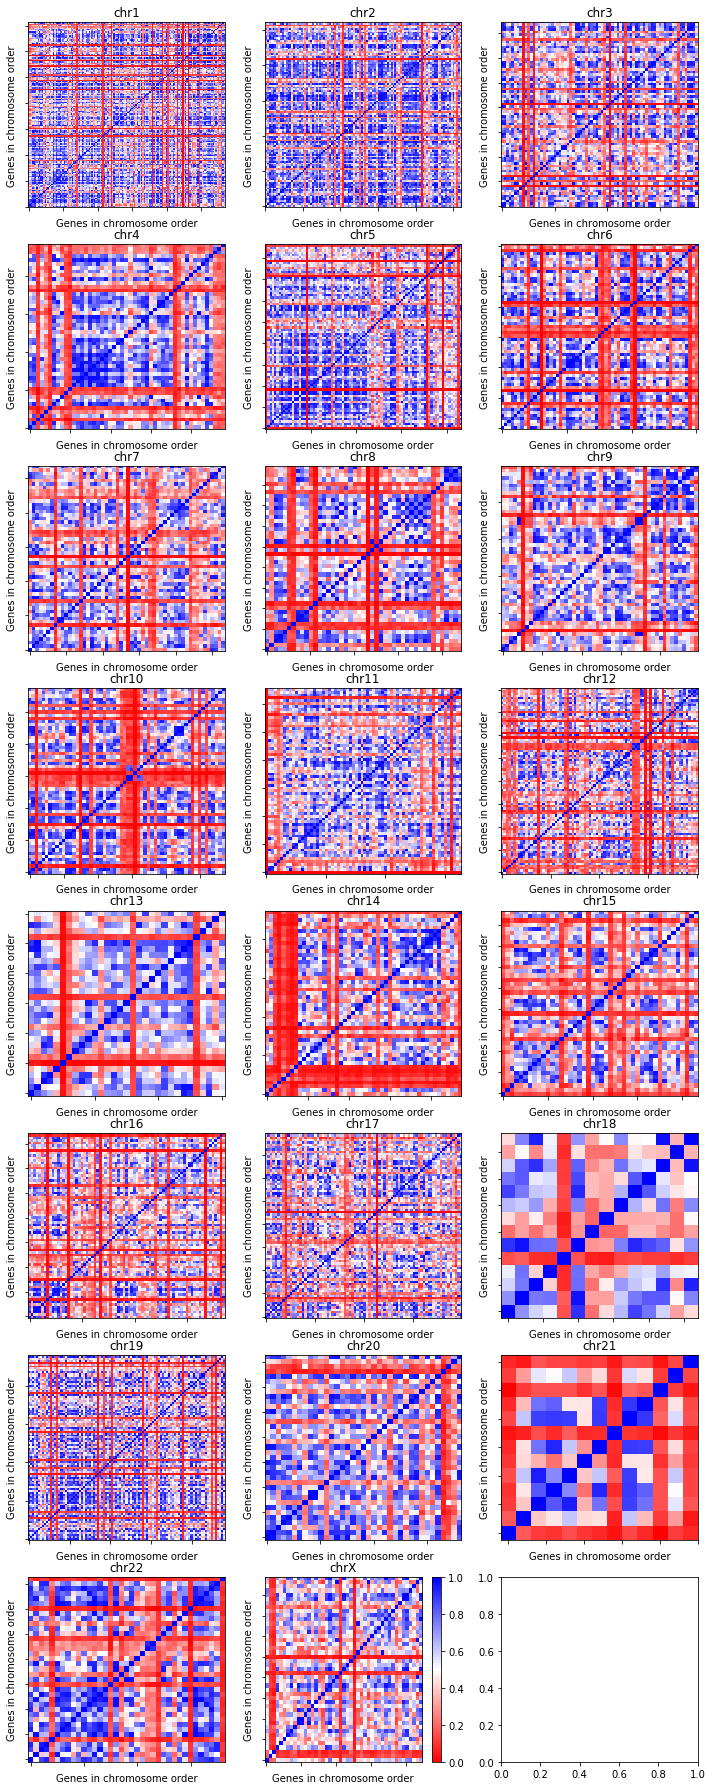

In [288]:
df_tmp = df_2_or[df_2_or['tot_rna_binding'] >= 0]
ranked_matirx = rank(df_tmp['exp'])
df_tmp['exp'] = ranked_matirx
plots_with_1_level_3d(df_tmp, 'exp')